L2 REGULARIZATION – FROM SCRATCH + Dropout +

In [35]:
import math
import matplotlib.pyplot as plt
import random

def sigmoid(x):
    return 1 / (1+ math.exp(-x))

def sigmoid_derivative(out):
    return out * (1 - out)

In [42]:
x = 1.0
y = 0.0

x_val = 1.0
y_val = 0.0

w = 0.8
b = 0.1

loss_l2 = []


lr = 0.1
lambda_ = 0.5

dropout_rate = 0.5

epochs = 100

patience = 3
best_val_loss = float("inf")
wait = 0

0.21218600470871365
Epoch 0 | Loss: 0.0228 | Weight: -0.0219
Epoch 0 | Train Loss: 0.0225 | Val Loss: 0.0216
0.2079699086819746
Epoch 1 | Loss: 0.0219 | Weight: -0.0231
Epoch 1 | Train Loss: 0.0216 | Val Loss: 0.0215
0.21102277988002344
Epoch 2 | Loss: 0.0225 | Weight: -0.0208
Epoch 2 | Train Loss: 0.0223 | Val Loss: 0.0214
0.2070048917853866
Epoch 3 | Loss: 0.0216 | Weight: -0.0221
Epoch 3 | Train Loss: 0.0214 | Val Loss: 0.0213
0.20987437925125027
Epoch 4 | Loss: 0.0223 | Weight: -0.0199
Epoch 4 | Train Loss: 0.0220 | Val Loss: 0.0212
0.20929783608300648
Epoch 5 | Loss: 0.0221 | Weight: -0.0179
Epoch 5 | Train Loss: 0.0219 | Val Loss: 0.0212
0.20872519492392158
Epoch 6 | Loss: 0.0219 | Weight: -0.0161
Epoch 6 | Train Loss: 0.0218 | Val Loss: 0.0211
0.20551231562917383
Epoch 7 | Loss: 0.0212 | Weight: -0.0179
Epoch 7 | Train Loss: 0.0211 | Val Loss: 0.0209
0.2076038729998274
Epoch 8 | Loss: 0.0217 | Weight: -0.0161
Epoch 8 | Train Loss: 0.0215 | Val Loss: 0.0209
0.20704262196179682
Ep

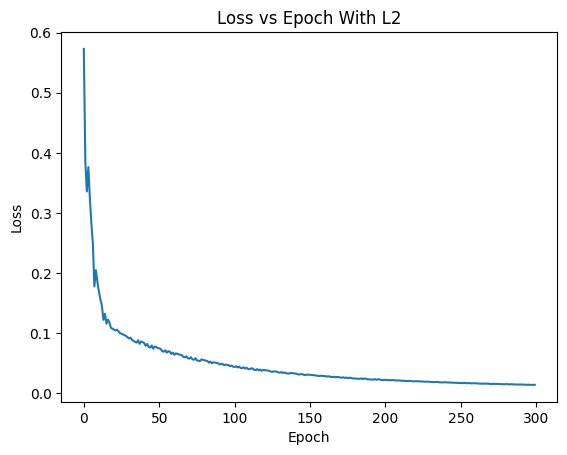

In [45]:
for epoch in range(epochs):

    neuron_active = 0 if random.random() < dropout_rate else 1

    z = (x * w * neuron_active) + b
    y_hat = sigmoid(z)

    print(y_hat)


    mse_loss = 0.5 * (y - y_hat) ** 2
    l2_loss = lambda_ * (w ** 2)
    loss = mse_loss + l2_loss
    loss_l2.append(loss)

    d_loss_yhat = y_hat -y
    d_yhat_z = sigmoid_derivative(y_hat)

    grad_w = d_loss_yhat * d_yhat_z * x * neuron_active
    grad_w_12 = grad_w + (2 * lambda_ * w)

    grad_b = d_loss_yhat * d_yhat_z

    w = w - lr * grad_w_12
    b = b - lr * grad_b

    print(f"Epoch {epoch} | Loss: {loss:.4f} | Weight: {w:.4f}")

    z_val = w * x_val + b
    y_val_hat = sigmoid(z_val)

    val_loss = 0.5 * (y_val - y_val_hat) ** 2

    print(f"Epoch {epoch} | Train Loss: {mse_loss:.4f} | Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1

    if wait == patience:
        print("Early stopping triggered")
        break

plt.figure()
plt.plot(loss_l2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch With L2")
plt.show()


L2 sirf 2 jagah aata hai:

l2_loss = lambda_ * (w ** 2)
grad_w_l2 = grad_w + (2 * lambda_ * w)


Dropout ka CORE IDEA:

active = 0 if random.random() < dropout_rate else 1

Early Stopping sirf ye logic hai:

if val_loss < best_val_loss:
    best_val_loss = val_loss
    wait = 0
else:
    wait += 1

if wait == patience:
    break
